# Ensemble methods. Boosting


## AdaBoost

AdaBoost consists of following steps:
* initialize weights to $\frac{1}{N}$, where $N$ is the number of datapoints,
* loop until 
  $\varepsilon_{t}<\frac{1}{2}$
  or maximum number of iteration is reached,

* train classifier on ${S,w^{(t)}}$ and get a hypothesis $h_{t}(x_{n})$ for datapoints $x_{n}$,

* compute error $\varepsilon_{t}=\sum_{n=1}^{N}w_{n}^{(t)}I(y_{n}\neq h_{t}(x_{n}))$,       

* set $\alpha_{t}=\log(\frac{1-\varepsilon_{t}}{\varepsilon_{t}})$.
  
* update weights $w_{n}^{(t+1)}=\frac{w_{n}^{(t)}\exp{\alpha_{t}I(y_{n}\neq h_{t}(x_{n}))}}{Z_{t}}$,
  where $Z_{t}$ is a normalization constant,

* output $f(X)=\text{sign}(\sum_{t=1}^{T}\alpha_{t}h_{t}(x))$.
  
Example taken from Marsland, Machine Learning: https://seat.massey.ac.nz/personal/s.r.marsland/MLBook.html.


First, we need to import libraries:

In [58]:
%store -r data_set
%store -r labels
import numpy as np
from sklearn.tree import DecisionTreeClassifier

Variables that are used by the classifier:

In [59]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn.model_selection import train_test_split


# labels = 2
dimension = 2

iris = load_iris()

train_set, test_set, train_labels, test_labels = train_test_split(data_set, labels,
                                                                            test_size=0.33, random_state=42)

Weights initialization:

In [60]:
number_of_iterations = 10
weights = np.ones((len(test_set),)) / len(test_set)
print(weights)

[0.02325581 0.02325581 0.02325581 0.02325581 0.02325581 0.02325581
 0.02325581 0.02325581 0.02325581 0.02325581 0.02325581 0.02325581
 0.02325581 0.02325581 0.02325581 0.02325581 0.02325581 0.02325581
 0.02325581 0.02325581 0.02325581 0.02325581 0.02325581 0.02325581
 0.02325581 0.02325581 0.02325581 0.02325581 0.02325581 0.02325581
 0.02325581 0.02325581 0.02325581 0.02325581 0.02325581 0.02325581
 0.02325581 0.02325581 0.02325581 0.02325581 0.02325581 0.02325581
 0.02325581]


The data set looks as:

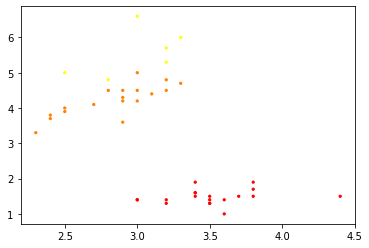

In [61]:
import matplotlib.pyplot as plt

sizes = np.ones(len(test_set))*5

plt.scatter(test_set[:, 1], test_set[:, 2], c=test_labels, s=sizes, cmap='autumn')
plt.show()

In [62]:
def train_model(classifier, weights):
    return classifier.fit(X=test_set, y=test_labels, sample_weight=weights)

Accuracy vector calculation for the weights: 0 - don't change the weight, 1 - change it.

In [63]:
def calculate_accuracy_vector(predicted, labels):
    result = []
    for i in range(len(predicted)):
        if predicted[i] == labels[i]:
            result.append(0)
        else:
            result.append(1)
    return result

Calculate the error rate $\varepsilon_{t}=\sum_{n=1}^{N}w_{n}^{(t)}I(y_{n}\neq h_{t}(x_{n}))$:

In [64]:
def calculate_error(weights, model):
    predicted = model.predict(test_set)
    return np.dot(weights,calculate_accuracy_vector(predicted, test_labels))

Calculate the $\alpha_{t}=\log(\frac{1-\varepsilon_{t}}{\varepsilon_{t}})$:

In [65]:
def set_alpha(error_rate):
    return np.log((1-error_rate)/error_rate)

Calculate the new weights $w_{n}^{(t+1)}=\frac{w_{n}^{(t)}\exp{\alpha_{t}I(y_{n}\neq h_{t}(x_{n}))}}{Z_{t}}$:

In [66]:
def set_new_weights(old_weights, alpha, model):
    new_weights = old_weights * np.exp(np.multiply(alpha,calculate_accuracy_vector(model.predict(test_set), test_labels)))
    Zt = np.sum(new_weights)
    return new_weights / Zt

Now, it's time to run the code and check the weights:

In [67]:
classifier = DecisionTreeClassifier(max_depth=1, random_state=1)
classifier.fit(X=train_set, y=train_labels)
alphas = []
classifiers = []
for iteration in range(number_of_iterations):
    model = train_model(classifier, weights)
    error_rate = calculate_error(weights, model)
    alpha = set_alpha(error_rate)
    weights = set_new_weights(weights, alpha, model)
    alphas.append(alpha)
    classifiers.append(model)

print(weights)

[0.01048849 0.01092477 0.01092477 0.01092477 0.05984301 0.01048849
 0.01048849 0.05984301 0.01048849 0.01092477 0.01048849 0.01092477
 0.01048849 0.01092477 0.01048849 0.05984301 0.01092477 0.01048849
 0.01048849 0.01048849 0.01092477 0.01092477 0.05984301 0.01092477
 0.20078494 0.01092477 0.11412513 0.01048849 0.01092477 0.01092477
 0.01092477 0.01092477 0.01048849 0.01092477 0.01048849 0.05984301
 0.01048849 0.01092477 0.01048849 0.01092477 0.01092477 0.01048849
 0.01048849]


In [68]:
weights = (weights/np.min(weights))*2

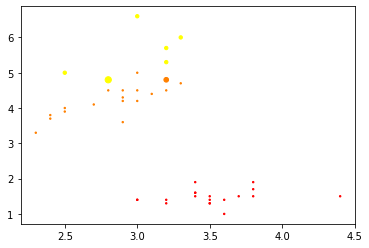

In [69]:
plt.scatter(test_set[:, 1], test_set[:, 2], c=test_labels, s=weights, cmap='autumn')


plt.show()